In [ ]:
%matplotlib inline

import corpusToDict as ctd

from nltk.tokenize import word_tokenize
from nltk import ngrams, FreqDist
from nltk.corpus import stopwords
import nltk

nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
import string 

read the dataset here:

In [ ]:
# path to the corpus:
filePath = "./Corpus.csv"

corpus = ctd.getCorpus(filePath)

labels = {  0: "Politics",
            1: "Sport",
            2: "Technology",
            3: "Entertainment",
            4: "Business"}

In [ ]:
# find the vocabulary of the corpus, and a large combined string of all the text:
vocabulary = set()
data = ""

# # stores the corpus, but with each document tokenised 
# tokenisedDocuments = []

# list to store the word counts of each document
docWordCounts = []

# list to store number of documents in each category
categoryDocCounts = [0] * 5

for i in range(1, len(corpus)):
    
    text = corpus[i][0]
    category = int(corpus[i][1])
    
    # update category documents count
    categoryDocCounts[category] += 1
    
    data += text
    tokens = word_tokenize(text)
    
    wordCount = 0
    
    # store tokenised text of each document, removing punctuation
    # tempToken = []
    for token in tokens:
        if token not in string.punctuation:
            wordCount +=1

    docWordCounts.append(wordCount)    
    
    vocabulary.update(tokens)
    

## Performing some basic corpus analysis

PLot a histogram of word counts of Documents: 

In [ ]:
fig = plt.figure(figsize=(20, 5))

# everyone will thank me for this
plt.style.use('dark_background')

# creating a bar plot
nBins = 999
plt.hist(docWordCounts, nBins)



plt.xlabel("Document Numbers")
plt.ylabel("Word Count")
plt.title("Word Count of Documents")

plt.show()




PLotting for number of documents under each category

In [ ]:
fig = plt.figure(figsize=(15, 5))

# everyone will thank me for this
plt.style.use('dark_background')

# creating a bar plot
plt.bar(labels.values(), categoryDocCounts, color="aqua", width=0.4)



plt.xlabel("Category")
plt.ylabel("Count")
plt.title(f"Number of Documents per Category")

plt.show()

Perform some basic analysis on the vocablualry now


In [ ]:
print(list(vocabulary)[:50])


In [ ]:
print(len(vocabulary))

### Plot and print the 5 most frequent N-gram sequences of len 2, 3, 4, 5

In [ ]:
allCounts = {}

for size in range(2, 6):
    allCounts[size] = FreqDist(ngrams(data, size))
    

PLotting for ngrmas of desired size 

In [ ]:
for size in [2, 3, 4, 5]:
    grams = allCounts[size].most_common(5)
    sequences = []
    values = []

    # getting the n-gram values and their respective frequencies in their respective lists to plot them:
    for pairs in grams:
        
        string = ""
        for chars in pairs[0]:
            if chars == " ":
                string+= "_"
            else:
                string += chars
        sequences.append(string)
        
        values.append(pairs[1])

    fig = plt.figure(figsize=(10, 5))
    
    # everyone will thank me for this
    plt.style.use('dark_background')
    
    # creating a bar plot
    plt.bar(sequences, values, color="aqua", width=0.4)
    


    plt.xlabel("Ngram Sequence [Spaces replaced with '_']")
    plt.ylabel("Frequency in Corpus")
    plt.title(f"Top 5 {size}-grams in the Corpus")

    plt.show()

#### Creating Wordclouds for each category: 

In [ ]:

# generate word clouds for each category in the corpus

# number of categories in the corpus
nCategories = 5

# store a large combined string of all text per category
textOfCategory = [""] * nCategories


for i in range(1, len(corpus)):
    
    text = corpus[i][0]
    category = int(corpus[i][1])

    textOfCategory[category] += text
    

In [ ]:

stop_words = set(stopwords.words("english"))

wc = WordCloud(stopwords=stop_words)

for i, text in enumerate(textOfCategory):
    wc.generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Category: {labels[i]}")
    plt.show()
    

Word clouds with nouns only

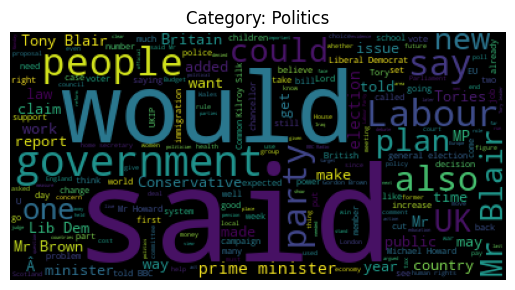

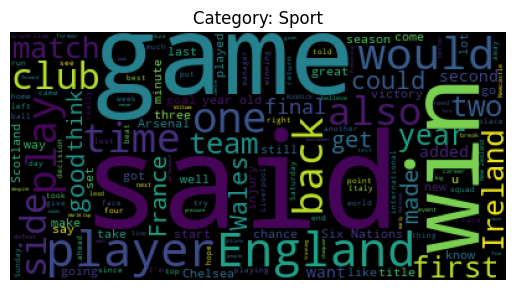

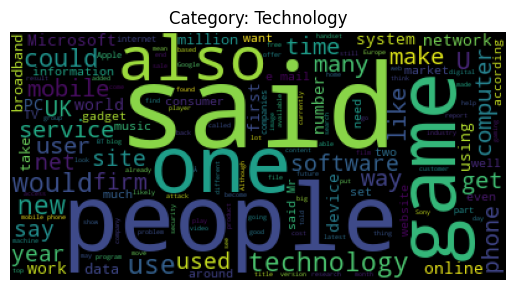

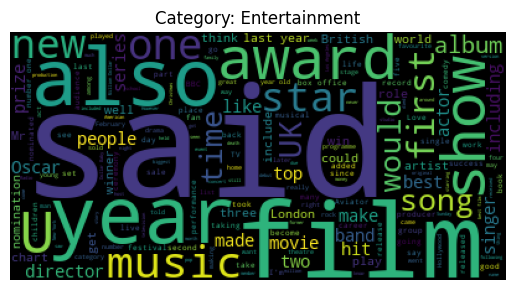

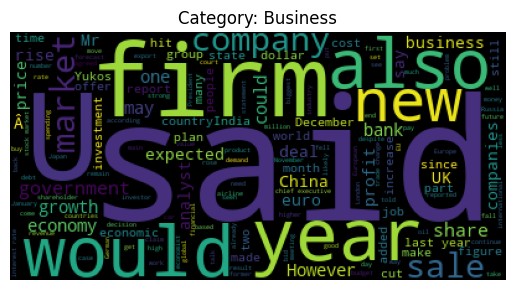

In [9]:

stop_words = set(stopwords.words("english"))

wc = WordCloud(stopwords=stop_words)

for i, text in enumerate(textOfCategory):
       
    nouns = "" #empty to array to hold all nouns

    for word in text:
        for word, pos in nltk.pos_tag(nltk.word_tokenize(str(word))):
            if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                nouns += word + " "
    
    
    wc.generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Category: {labels[i]}")
    plt.show()




#### Counting top N words that occur in the most documents:

In [ ]:

# finding all words in vocabulary, excluding stop words
words = [word for word in vocabulary if word not in stop_words]

# dictionary to keep track of number of documents each word is in
wordCount = {}

# finding the total number of documents each word is in
#todo maybe make it more efficient at some point (it takes ~ 2min to execute on my)
for word in words:
    count = 0
    
    for i in range(1, len(corpus)):
        text = corpus[i][0]
        if word in text:
            count += 1
    
    wordCount[word] = count


    

Finding for all words longer than 3 characters 

In [ ]:
wordCount = dict(sorted(wordCount.items(), key=lambda item: item[1], reverse=True))
# wordCount
wordCountList = [(word, wordCount[word]) for word in wordCount if (word in vocabulary and word not in stop_words and len(word) > 3)]

PLotting top 30 words:

In [ ]:
topWords = []
topWordCounts = []

counter = 0
for words, counts in wordCountList:
    topWords.append(words)
    topWordCounts.append(counts)
    
    counter += 1
    if counter >= 30:
        break

# plot data now
fig = plt.figure(figsize=(20, 5))

# everyone will thank me for this
plt.style.use('dark_background')

# creating a bar plot
plt.bar(topWords, topWordCounts, color="aqua", width=0.2)



plt.xlabel("Words")
plt.ylabel("Number of documnents occurs in")
plt.title(f"Top words that occur in the most Documents")

plt.show()

